In [1]:
# python get cwd
import os

cwd = os.getcwd()
print(cwd)

c:\Users\priel\Downloads\semesterE\ProjectML_236757\frequency


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [ ]:
def get_rgb(image):
    return image[:, :, 0], image[:, :, 1], image[:, :, 2]


(471, 470, 3)


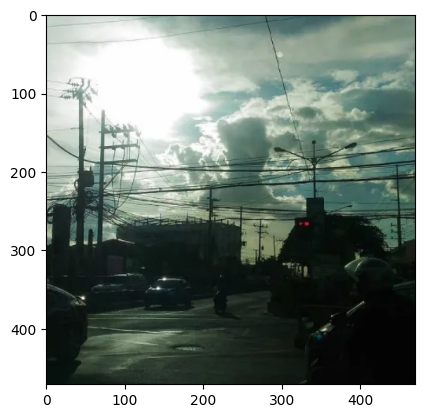

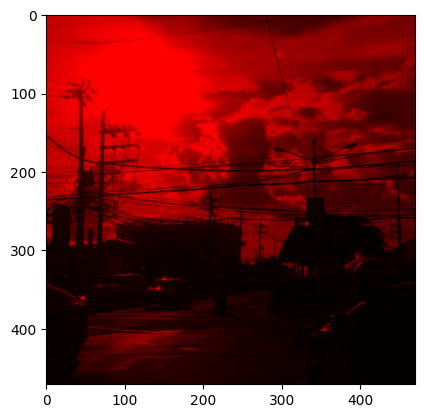

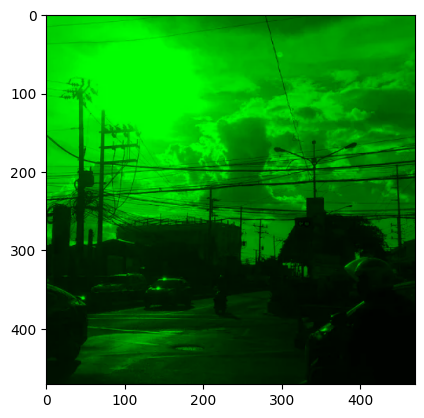

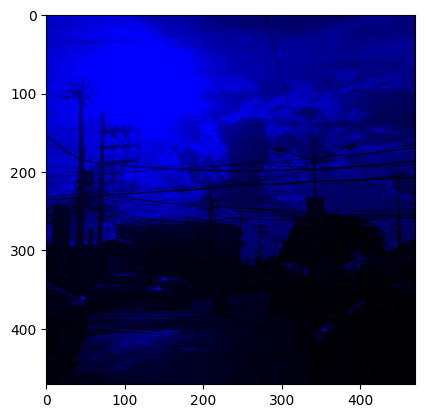

In [24]:
dark_image = imread('against_the_light.png')
red = dark_image.copy()
green = dark_image.copy()
blue = dark_image.copy()
# remove red channel
print(dark_image.shape)
red[:, :, 1] = 0
red[:, :, 2] = 0
plt.imshow(dark_image)
green[:, :, 0] = 0
green[:, :, 2] = 0
blue[:, :, 0] = 0
blue[:, :, 1] = 0
plt.imshow(dark_image)
plt.show()
plt.imshow(red)
plt.show()
plt.imshow(green)
plt.show()
plt.imshow(blue)
plt.show()


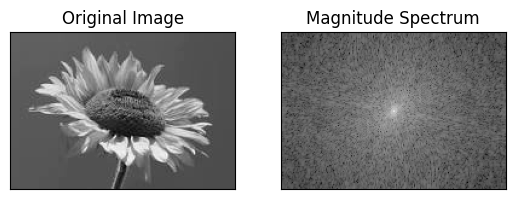

In [25]:
import cv2


def image_to_frequency_domain(image_path, plot=False):
    # Read the image
    img = cv2.imread(image_path, 0)  # Read the image in grayscale

    # Perform 2D Fourier Transform
    f_transform = np.fft.fft2(img)
    # Shift zero frequency components to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    # Compute magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)

    if plot:
        # Plot the original and magnitude spectrum side by side
        plt.subplot(121), plt.imshow(img, cmap='gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122), plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
        plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

        plt.show()

    return magnitude_spectrum


# Example usage:
# Call the function with an image path and set plot=True if you want to visualize the frequency domain
freq_domain = image_to_frequency_domain('real_flower.jpg', plot=True)